In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\1923360969.py:4: UserWarning: Parsing '15-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\1923360969.py:4: UserWarning: Parsing '16-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\1923360969.py:4: UserWarning: Parsing '17-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\1923360969.py:4: UserWarning: Parsing '18-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_2

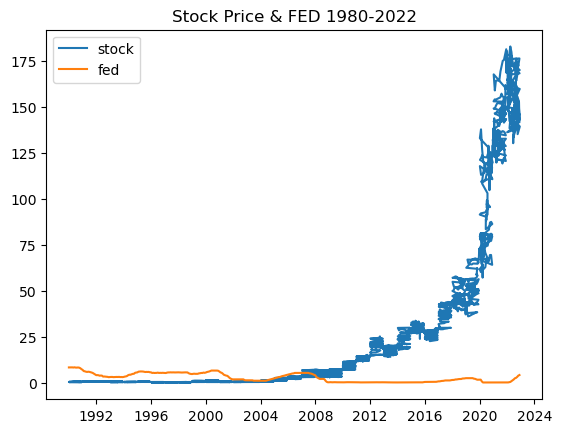

In [12]:
df=pd.read_csv('./apple1990~2022.csv')
fed=pd.read_csv('./fedfunds1990~2022.csv')

df['Date']=pd.to_datetime(df['Date'])
fed['Date']=pd.to_datetime(fed['DATE'])

plt.title('Stock Price & FED 1980-2022')
plt.plot(df['Date'], df['Close'],label="stock")
plt.plot(fed['Date'],fed['FEDFUNDS'],label="fed")

plt.legend()
plt.show()

C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\2984137209.py:4: UserWarning: Parsing '16-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\2984137209.py:4: UserWarning: Parsing '17-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\2984137209.py:4: UserWarning: Parsing '18-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\2984137209.py:4: UserWarning: Parsing '19-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_2

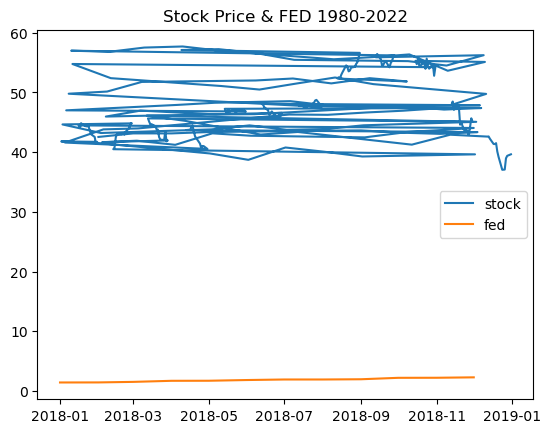

In [15]:
df=pd.read_csv('./apple-cut.csv')
fed=pd.read_csv('./fedfunds-cut.csv')

df['Date']=pd.to_datetime(df['Date'])
fed['Date']=pd.to_datetime(fed['DATE'])

plt.title('Stock Price & FED 1980-2022')
plt.plot(df['Date'], df['Open'],label="stock")
plt.plot(fed['Date'],fed['FEDFUNDS'],label="fed")

plt.legend()
plt.show()

In [ ]:
import seaborn as sns
df['Date']=pd.to_datetime(df['Date'])

sns.pairplot(df)
plt.show()

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

df=df.drop(columns=['Date'])

scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df)

train_size=int(len(df_scaled)*0.8)
test_size=len(df_scaled)-train_size
train,test=df_scaled[0:train_size,:],df_scaled[train_size:len(df_scaled),:]

def create_sequences(data,t,d):
    X,Y=[],[]
    for i in range(len(data)-t-1):
        a=data[i:(i+t),:]
        X.append(a); Y.append(data[i+t,:])
    return np.array(X),np.array(Y)

t=10
d=9
X_train,Y_train=create_sequences(train,t,d)
X_test,Y_test=create_sequences(test,t,d)


In [ ]:
# Building Model

model=Sequential()
model.add(LSTM(50,input_shape=(t,d)))
model.add(Dense(d))
model.compile(loss='mean_squared_error', optimizer='adam')

history=model.fit(X_train,Y_train,epochs=50,batch_size=1,verbose=1)

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'],loc='upper left')
plt.show()